<a href="https://colab.research.google.com/github/TingfangHuang/GenAIHumanities/blob/main/%E9%BB%83%E8%8E%9B%E9%88%81_61221055L_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW6_程式練習 (III)

這是一個關於現代奧運會的歷史資料集，包含從1896年雅典到2016年里約的所有賽事。[資料來源](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)

> **請注意**：直到1992年，夏季和冬季運動會是在同一年舉行的。之後它們就分開，冬季運動會在1994年開始，然後夏季運動會在1996年，再然後是冬季運動會在1998年，以此類推。分析這些數據時，人們常犯的一個錯誤是假設夏季和冬季運動會一直都是分開的。

### 內容
資料集 `athlete_events.csv` 包含271116個橫列和15個直欄。每個橫列對應一位運動員參加一個奧運賽事。這些直欄包括：

- ID - 每個運動員的唯一編號
- Name - 運動員的名字
- Sex - 男（M）或女（F）
- Age - 年齡（整數）
- Height - 身高（以厘米為單位）
- Weight - 體重（以千克為單位）
- Team - 隊伍名稱
- NOC - 國家奧林匹克委員會的3個字母代碼
- Games - 奧運年份和賽季
- Year - 奧運年份（整數）
- Season - 奧運賽季（夏季或冬季）
- City - 主辦城市
- Sport - 運動項目
- Event - 賽事
- Medal - 獲得的獎牌（金牌、銀牌、銅牌或NA）

## 題目一：依運動項目填補缺失值 (25%)


### 📄 題目描述：

本資料集中記錄了歷年奧運運動員的基本資訊，包括身高（`Height`）與體重（`Weight`）。由於有部分資料缺失，請你嘗試根據**相同運動項目（`Sport`）**的平均身高與體重，來填補這些缺失值。

---

### ✅ 任務要求：
  1. 讀取資料集，將資料集存放在 `oly_df` 中並列印出來。
  2. 針對資料中的 `Height` 和 `Weight` 欄位進行缺失值填補。
  3. 填補方式為：
   - 依據每個 `Sport` 的非缺失資料，分別計算 `Height` 與 `Weight` 的**平均值**。
   - 將該運動項目中缺失的 `Height` 和 `Weight` 欄位，使用對應的平均值進行填補。
  4. 如果某一個運動項目中，所有選手的 `Height` 或 `Weight` 值都是缺失的，請**略過此運動項目**，**不要嘗試填補**。
  5. 請輸出以下資訊：
   - 每個 `Sport` 對應的 `Height` 與 `Weight` 平均值。
   - 補值後，`Height` 欄位中仍為缺失值的資料筆數
   - 補值後，`Weight` 欄位中仍為缺失值的資料筆數

In [1]:
### 非台大學生請執行以下程式碼獲取資料集 ###

!gdown 1BzjcfGjxNl2VF_LBm8TxpVE6YykYZMhn

### 非台大學生請執行以上程式碼獲取資料集 ###

Downloading...
From: https://drive.google.com/uc?id=1BzjcfGjxNl2VF_LBm8TxpVE6YykYZMhn
To: /content/athlete_events.csv
100% 41.5M/41.5M [00:00<00:00, 81.9MB/s]


In [2]:
import pandas as pd


oly_df = pd.read_csv('/content/athlete_events.csv')
print("原始資料筆數:", len(oly_df))


h_before = oly_df['Height'].isna().sum()
w_before = oly_df['Weight'].isna().sum()


sport_avg = (
    oly_df
    .groupby('Sport', dropna=True)[['Height', 'Weight']]
    .mean()
    .rename(columns={'Height':'Height_mean', 'Weight':'Weight_mean'})
)


oly_df = oly_df.merge(sport_avg, how='left', on='Sport')


oly_df['Height_filled'] = oly_df['Height'].fillna(oly_df['Height_mean'])
oly_df['Weight_filled'] = oly_df['Weight'].fillna(oly_df['Weight_mean'])


print("\n各 Sport 平均（四捨五入到1位小數）:")
display(sport_avg.round(1).head())

print(f"\n補值前 Height 缺失: {h_before}，補值後剩餘: {oly_df['Height_filled'].isna().sum()}")
print(f"補值前 Weight 缺失: {w_before}，補值後剩餘: {oly_df['Weight_filled'].isna().sum()}")


# oly_df.to_csv('/content/oly_df_filled.csv', index=False)


原始資料筆數: 271116

各 Sport 平均（四捨五入到1位小數）:


,Height_mean,Weight_mean
Sport,,
Aeronautics,NaN,NaN
Alpine Skiing,173.5,72.1
Alpinism,NaN,NaN
Archery,173.2,70.0
Art Competitions,174.6,75.3



補值前 Height 缺失: 60171，補值後剩餘: 99
補值前 Weight 缺失: 62875，補值後剩餘: 217


## 題目二：統計各國獎牌數量（25%）

### 📄 題目描述：

本資料集中包含了運動員參加比賽的紀錄，其中 `Medal` 欄位記錄了選手是否獲得獎牌（金、銀、銅），`NOC` 欄位表示國家或地區的代碼（例如 USA、CHN、JPN 等）。

請你統計出**每個國家**獲得的金牌、銀牌、銅牌，以及總獎牌數，並依據總獎牌數進行排序（由高至低）。

---

### ✅ 任務要求：

1. 以 `NOC` 為單位，統計該國獲得的：
   - 金牌（`Medal == "Gold"`）
   - 銀牌（`Medal == "Silver"`）
   - 銅牌（`Medal == "Bronze"`）
2. 計算總獎牌數（上述三者加總）
3. 將結果依照總獎牌數 `Total` 欄位由高至低排序。
4. 輸出結果需包含以下欄位：
   - `NOC`
   - `Gold`
   - `Silver`
   - `Bronze`
   - `Total`

In [3]:

medal_df = oly_df[oly_df['Medal'].notna()]


medal_count = (
    medal_df
    .pivot_table(index='NOC',
                 columns='Medal',
                 values='ID',
                 aggfunc='count',
                 fill_value=0)
    .rename_axis(None, axis=1)
)


for col in ['Gold', 'Silver', 'Bronze']:
    if col not in medal_count.columns:
        medal_count[col] = 0

medal_count = medal_count[['Gold', 'Silver', 'Bronze']]


medal_count['Total'] = medal_count.sum(axis=1)


medal_count = medal_count.sort_values('Total', ascending=False).reset_index()


print("各國/地區獎牌統計（前 20 筆示例）")
display(medal_count.head(20))

# 若需完整結果 CSV，可取消註解
# medal_count.to_csv('/content/noc_medal_count.csv', index=False)


各國/地區獎牌統計（前 20 筆示例）


,NOC,Gold,Silver,Bronze,Total
0,USA,2638,1641,1358,5637
1,URS,1082,732,689,2503
2,GER,745,674,746,2165
3,GBR,678,739,651,2068
4,FRA,501,610,666,1777
5,ITA,575,531,531,1637
6,SWE,479,522,535,1536
7,CAN,463,438,451,1352
8,AUS,348,455,517,1320
9,RUS,390,367,408,1165


## 題目三：找出參賽人數最多的運動項目（25%）

### ✅ 任務要求：

1. 資料預處理：
  - 移除重複的參賽者紀錄（提示：可使用 `ID`、`Year` 和 `Sport` 這三個欄位進行 `drop_duplicates()`）。

2. 資料切分：
  - 分別取出夏季奧運與冬季奧運的資料。

4. 分別計算：
  - 夏季奧運中，參賽人數最多的前 5 個運動項目
  - 冬季奧運中，參賽人數最多的前 5 個運動項目

5. 請印出這兩組熱門運動項目的名稱及對應人數

In [5]:

dedup_df = oly_df.drop_duplicates(subset=['ID', 'Year', 'Sport'])


summer_df = dedup_df[dedup_df['Season'] == 'Summer']
winter_df = dedup_df[dedup_df['Season'] == 'Winter']

def top5_sports(df, season_name):
    """回傳參賽人數最多前 5 的 DataFrame（Sport, Athletes）。"""
    top5 = (
        df.groupby('Sport')['ID']          # 以 Sport 為單位計算獨立 ID 數
          .nunique()
          .sort_values(ascending=False)
          .head(5)
          .rename('Athletes')
          .reset_index()
    )
    print(f"\n{season_name} 奧運參賽人數最多的前 5 個運動項目:")
    display(top5)
    return top5

top5_summer = top5_sports(summer_df, "夏季")
top5_winter = top5_sports(winter_df, "冬季")


# top5_summer.to_csv('/content/top5_summer_sports.csv', index=False)
# top5_winter.to_csv('/content/top5_winter_sports.csv', index=False)



夏季 奧運參賽人數最多的前 5 個運動項目:


,Sport,Athletes
0,Athletics,22071
1,Swimming,8765
2,Rowing,7687
3,Football,6161
4,Cycling,5819



冬季 奧運參賽人數最多的前 5 個運動項目:


,Sport,Athletes
0,Ice Hockey,3843
1,Alpine Skiing,2735
2,Cross Country Skiing,2400
3,Bobsleigh,1694
4,Speed Skating,1582


## 題目四：畫出熱門運動項目的參與變化圖（25%）

### ✅ 任務要求：

1. 承上題，將上述統計結果畫成兩張堆疊長條圖（stacked bar chart）：
  - 圖一：夏季奧運熱門運動項目變化圖。
  - 圖二：冬季奧運熱門運動項目變化圖。


2. 視覺化要求：
  - `x` 軸為 `Year`，`y` 軸為 `No. of People Participated in Sport`
  - 每個堆疊的顏色區塊代表一個熱門運動項目
  - 圖片大小為 `(15, 6)`
  - 請為每張圖加上適當的標題，如：
    - `"Top 5 Sports Participation - Summer Olympics"`
    - `"Top 5 Sports Participation - Winter Olympics"`
  - 圖中應包含圖例（Legend），標示每種運動所代表的顏色



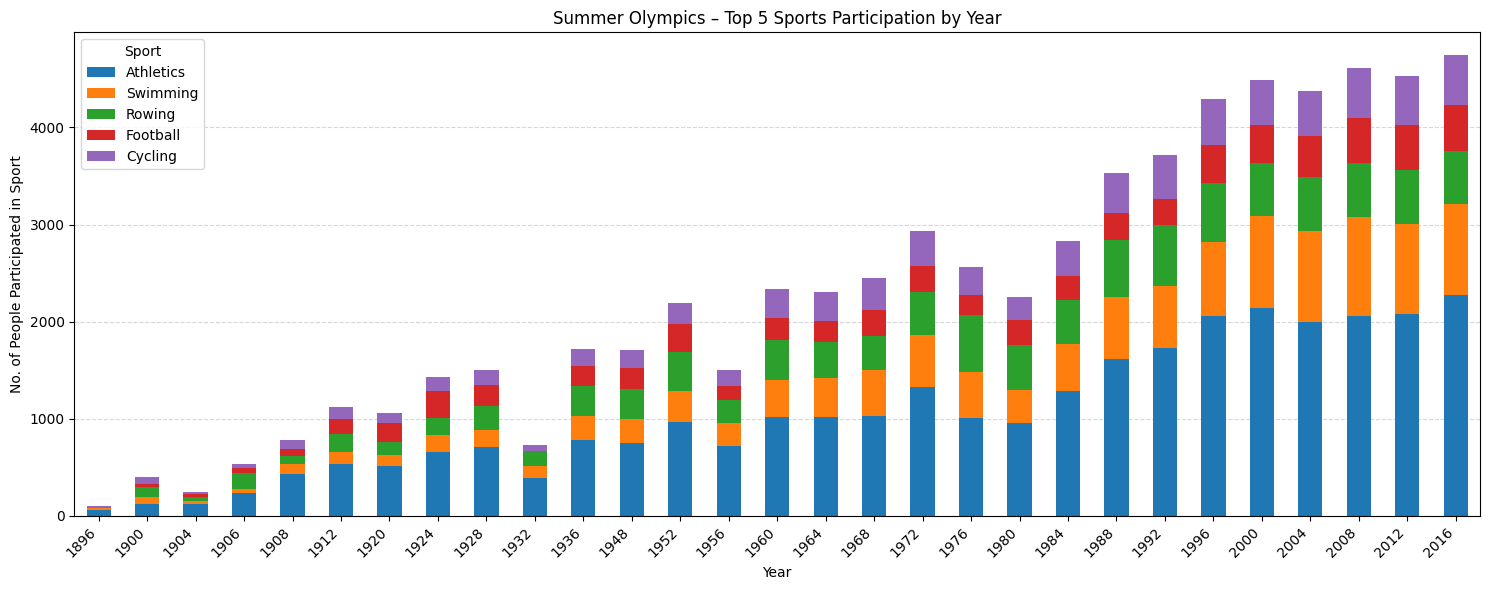

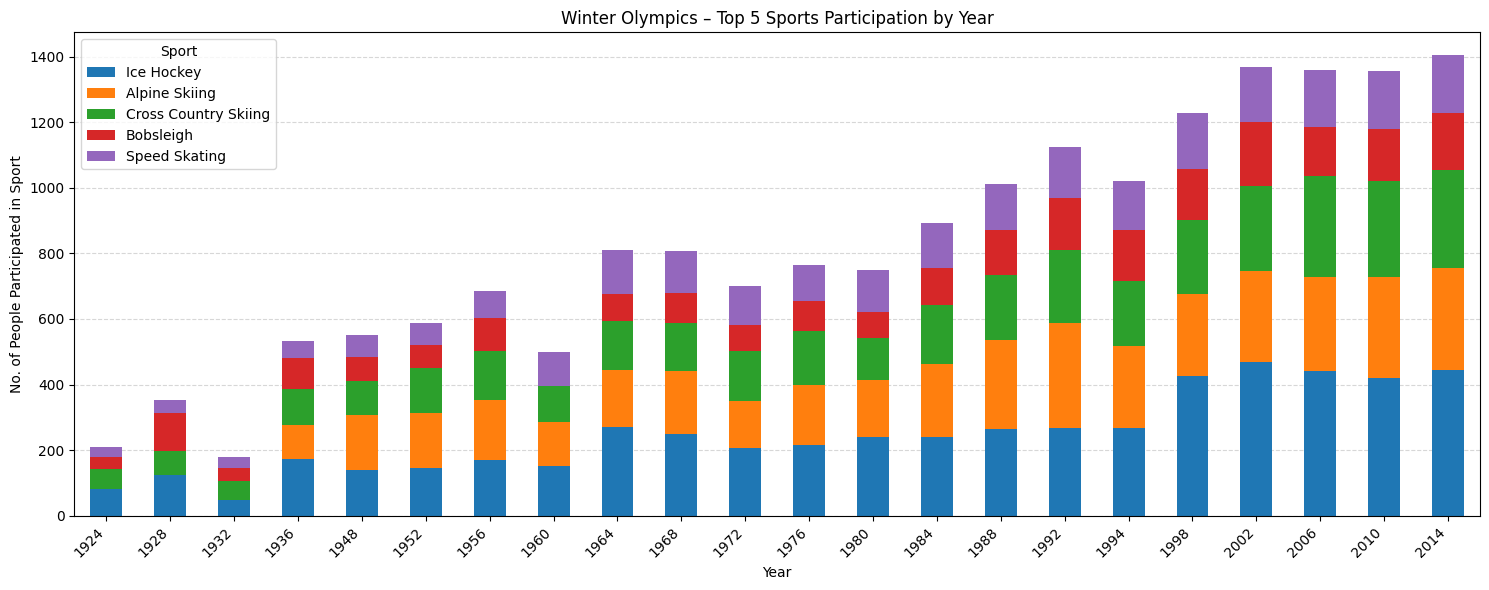

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


summer_sports = top5_summer['Sport'].tolist()
winter_sports = top5_winter['Sport'].tolist()


summer_plot_df = (
    dedup_df[dedup_df['Season'] == 'Summer']
    .query('Sport in @summer_sports')
)
winter_plot_df = (
    dedup_df[dedup_df['Season'] == 'Winter']
    .query('Sport in @winter_sports')
)

def make_stacked(df, sport_list):
    """回傳 Year × Sport 交叉表 (index=Year, columns=Sport, value=人數)。"""
    ctab = (
        df.groupby(['Year', 'Sport'])['ID']
          .nunique()
          .unstack(fill_value=0)
          .reindex(columns=sport_list)
          .sort_index()
    )
    return ctab

summer_yearly = make_stacked(summer_plot_df, summer_sports)
winter_yearly = make_stacked(winter_plot_df, winter_sports)


def plot_stacked(df, title):
    """畫堆疊長條圖，df 的 index 為 Year，columns 為 Sport。"""
    ax = df.plot(kind='bar',
                 stacked=True,
                 figsize=(15, 6),
                 legend=True,
                 zorder=2)

    ax.set_xlabel('Year')
    ax.set_ylabel('No. of People Participated in Sport')
    ax.set_title(title)
    ax.grid(axis='y', zorder=0, linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_stacked(summer_yearly, 'Summer Olympics – Top 5 Sports Participation by Year')
plot_stacked(winter_yearly, 'Winter Olympics – Top 5 Sports Participation by Year')
